# Projet Visualisation de données


## Introduction

Nous avons choisis de nous intéresser à un problème de santé publique : les accidents vasculaires cérébraux. Nous souhaitons mettre en évidence à travers de cette étude des caractéristiques qui influent sur le risque d'avoir un tel accident. Pour cela nous allons séparer notre étude en deux parties : les caractéristiques propres aux personnes (âge, maladies cardiaques, hypertensions...) par rapport aux choix et aux modes de vie des individus (lieu de résidence, fumeur, mariage, type de travail...).

Êtes-vous susceptible de faire un AVC ?

## Présentation du dataset

Le dataset que nous avons choisi, s'intitule 'Ensemble de données de prévision des accidents vasculaires cérébraux'. 
Les graphiques relatifs à la présentation du dataset sont disponibles dans la partie 0 : Graphiques pour l'étude de la population.

Imports nécessaires pour les différentes visualisations :

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objs as go
from matplotlib_venn import venn2
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Fonction permettant d'initialiser la database et d'effectuer le prétraitement :

In [253]:
def init_traitement_DB() :
    #Lecture du fichier
    df = pd.read_csv("healthcare-dataset-stroke-data.csv")
    
    # Suppression des lignes avec "Other" dans gender (1 ligne)
    id = df[df["gender"] == "Other"].index
    df = df.drop(id)

    # Suppression des lignes avec "Never_worked" dans work_type
    id = df[df["work_type"] == "Never_worked"].index
    df = df.drop(id)

    # Suppression des lignes avec "NaN" dans bmi
    df = df.dropna(subset=['bmi'])

    return df

## Partie 0 : Graphiques pour l'étude de la population 

Text(0.5, 1.0, "Distribution de l'âge en fonction du genre")

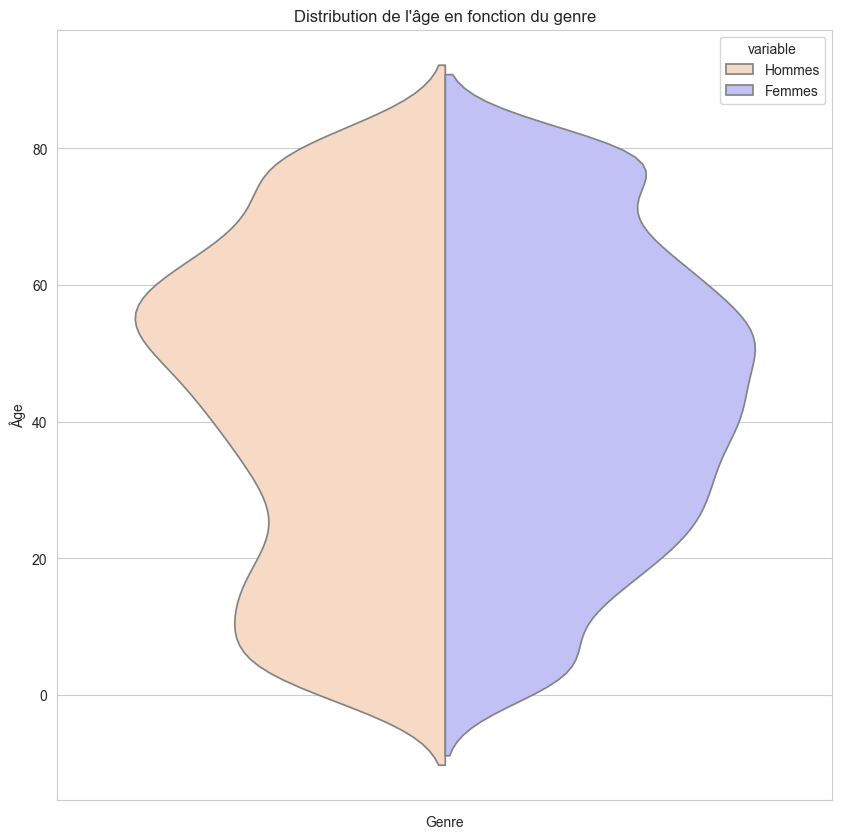

In [254]:
palette = {
    'violetf' : '#9381FF',
    'violetc' : '#B8B8FF',
    'blancg' : '#F8F7FF',
    'orangec' : '#FFEEDD',
    'orangef' : '#FFD8BE'
}
df = init_traitement_DB()
data_male = df[df['gender'] == "Male"]['age'].dropna()
data_female = df[df['gender'] == "Female"]['age'].dropna()

data = pd.DataFrame({'Hommes':data_male, 'Femmes':data_female})
data = data.melt()

plt.figure(figsize=(10, 10))
sns.violinplot(data=data, y='value', split=True, hue='variable', inner=None, palette={"Hommes": palette.get('orangef'), "Femmes": palette.get("violetc")})
plt.xlabel('Genre')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge en fonction du genre')

.......................................

In [255]:
df = init_traitement_DB()
repartition_genre = df['gender'].value_counts()
repartition_age = df['age'].value_counts()
repartition_hypertension = df['hypertension'].value_counts()
repartition_heart_disease = df['heart_disease'].value_counts()
repartition_ever_married = df['ever_married'].value_counts()
repartition_work_type = df['work_type'].value_counts()
repartition_residence_type = df['Residence_type'].value_counts()
df2 = df[df['smoking_status'] != 'Unknown']
repartition_smoking_status = df2['smoking_status'].value_counts()
repartition_stroke = df['stroke'].value_counts()
repartition_avg_glucose_level = df['avg_glucose_level'].value_counts()
repartition_bmi = df['bmi'].value_counts()

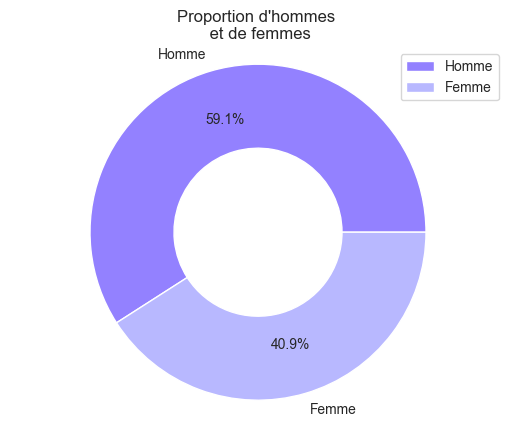

In [256]:
#Proportion d'hommes et de femmes
plt.pie(repartition_genre, labels = ["Homme", "Femme"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion d'hommes \n et de femmes", loc='center')
plt.axis('equal') 
plt.legend()

........................................................

C:\Users\lilis\AppData\Local\Temp\ipykernel_8108\1906199307.py:28: UserWarning:

The figure layout has changed to tight



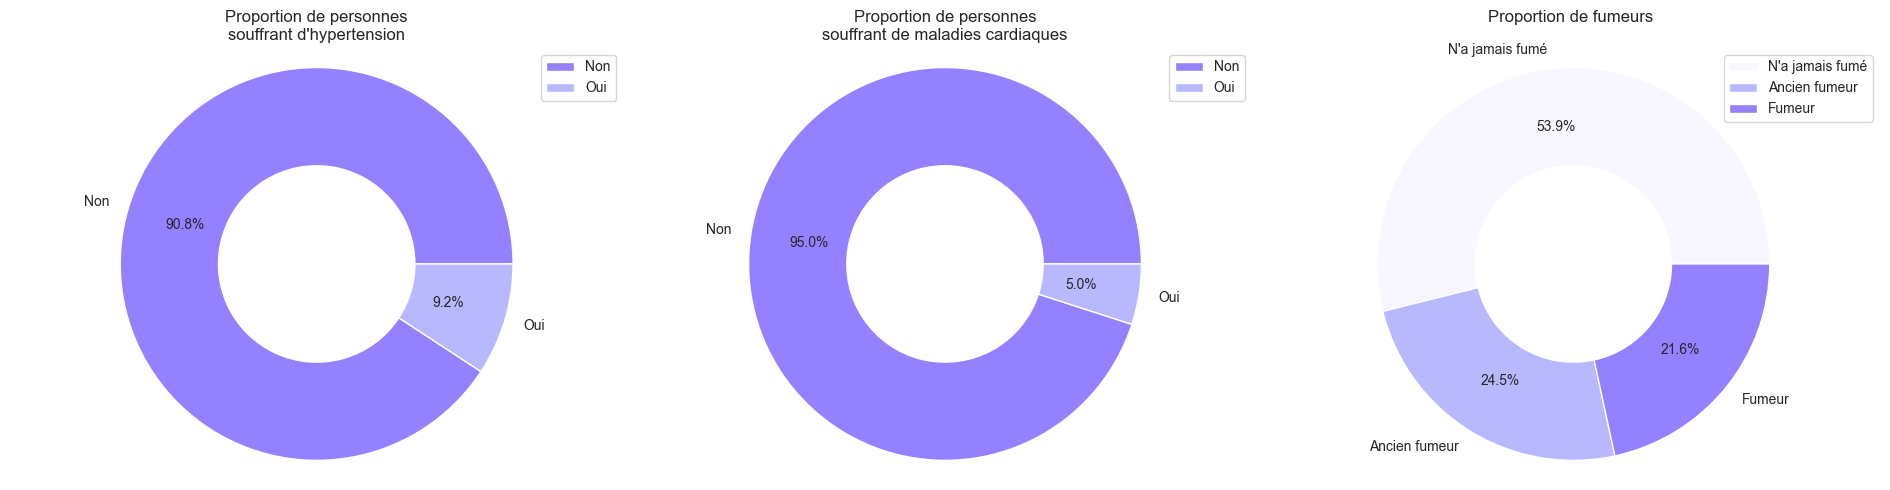

In [257]:
#Proportion de personnes souffrant d'hypertension, de maladies cardiaques et de fumeurs (santé)
pie_palette = [
    palette['blancg'], 
    palette['violetc'], 
    palette['violetf'] 
]

fig, ax = plt.subplots(1, 3, figsize=(19, 5),constrained_layout=True)

plt.subplot(1,3, 1)
plt.pie(repartition_hypertension, labels = ["Non", "Oui"], autopct='%1.1f%%', startangle=0, colors=[palette.get('violetf'),palette.get('violetc')],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion de personnes\nsouffrant d'hypertension", loc='center')
plt.axis('equal')
plt.legend()

plt.subplot(1,3, 2)
plt.pie(repartition_heart_disease, labels = ["Non", "Oui"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion de personnes\nsouffrant de maladies cardiaques", loc='center')
plt.axis('equal')
plt.legend()

plt.subplot(1,3, 3)
plt.pie(repartition_smoking_status, labels = ["N'a jamais fumé", "Ancien fumeur", "Fumeur"], autopct='%1.1f%%', startangle=0, colors=pie_palette ,wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion de fumeurs \n   ", loc='center')
plt.axis('equal')
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

........................................................

C:\Users\lilis\AppData\Local\Temp\ipykernel_8108\3226611464.py:28: UserWarning:

The figure layout has changed to tight



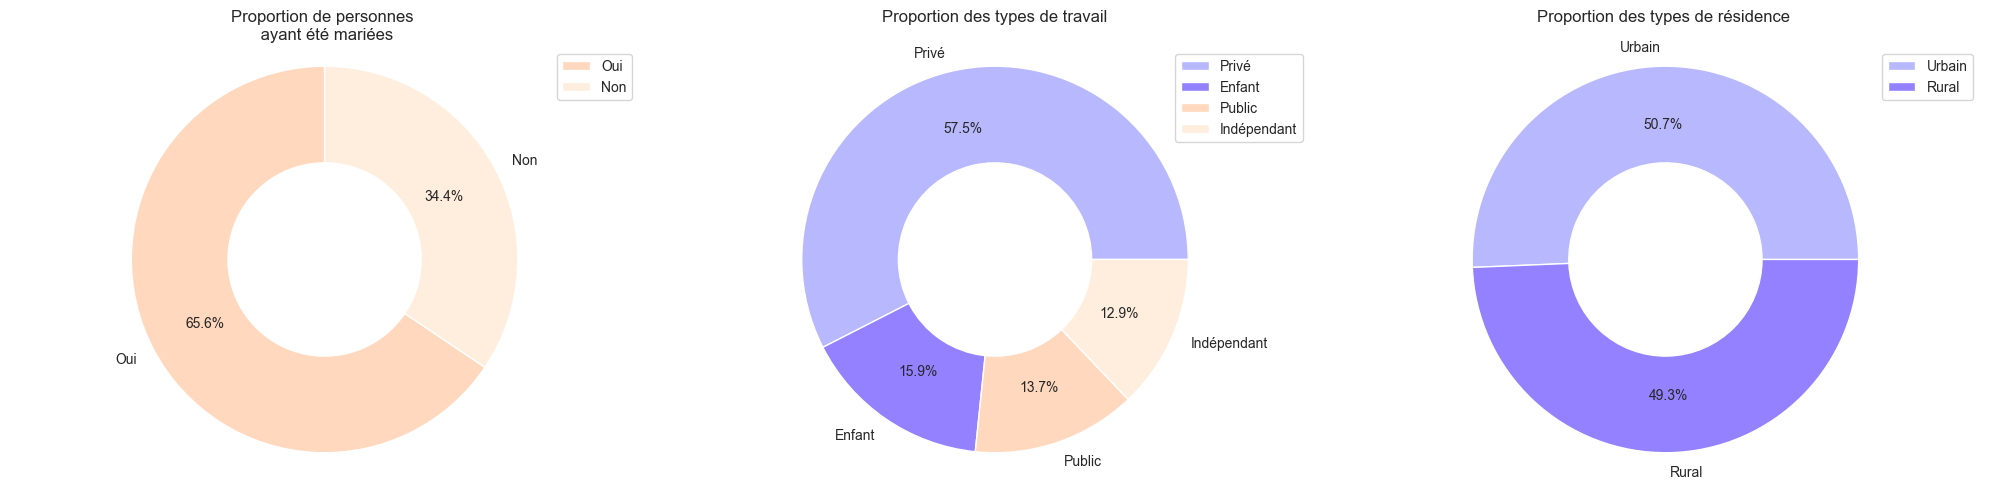

In [258]:
# Proportion de personnes ayant été mariées, de types de travail et de types de résidence (cadre de vie)
fig, ax = plt.subplots(1, 3, figsize=(20, 5),constrained_layout=True)

pie_palette = [
    palette['blancg'], 
    palette['violetc'], 
    palette['violetf'] 
]

plt.subplot(1,3, 1)
plt.pie(repartition_ever_married, labels = ["Oui", "Non"], autopct='%1.1f%%', startangle=90, colors=[palette.get('orangef'),palette.get('orangec')],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion de personnes \n ayant été mariées", loc='center')
plt.axis('equal')
plt.legend()

plt.subplot(1,3, 2)
plt.pie(repartition_work_type, labels = ["Privé", "Enfant", "Public", "Indépendant"], autopct='%1.1f%%', startangle=0, colors=[palette.get('violetc'),palette.get('violetf'),palette.get('orangef'),palette.get('orangec'),palette.get('blancg')],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion des types de travail\n", loc='center')
plt.axis('equal')
plt.legend()

plt.subplot(1,3, 3)
plt.pie(repartition_residence_type, labels = ["Urbain", "Rural"], autopct='%1.1f%%', startangle=0, colors=[palette.get('violetc'),palette.get('violetf')],wedgeprops=dict(width=0.5), pctdistance=0.7)
plt.title("Proportion des types de résidence \n   ", loc='center')
plt.axis('equal')
plt.legend()

plt.tight_layout() 
plt.show()

........................................................

Maintenant que nous avons une idée de la répartition de la population, nous allons pouvoir nous intéresser à l'étude des caractéristiques propres à un individu et comment elles influent sur le risque d'avoir un AVC.

## Partie 1 : Comment les caractéristiques propres à un individu influencent-elles le risque d'avoir un AVC ?

À quel âge sommes-nous plus enclins à faire un AVC ? 

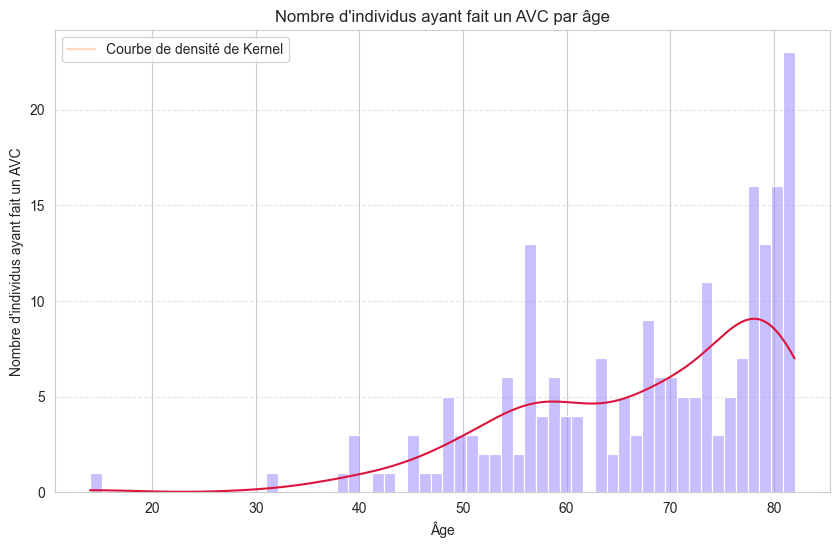

In [259]:
df = init_traitement_DB()
# Filtrer les données pour ne conserver que les personnes victimes d'AVC et leur âge
strokes_age = df[["stroke", "age"]]
strokes_age = strokes_age[strokes_age["stroke"] == 1]

# Créer un histogramme des âges pour les personnes décédées
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=strokes_age, x='age', bins=60, color='#9381FF', kde = True)    #Modifier par True si on veut la courbe de densité de kernel
ax.lines[0].set_color('crimson')
plt.title('Nombre d\'individus ayant fait un AVC par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'individus ayant fait un AVC')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.plot([], [], color='#FFD8BE', label='Courbe de densité de Kernel')
plt.legend()
plt.show()

Est-ce que le genre affecte les risques de faire un AVC ?

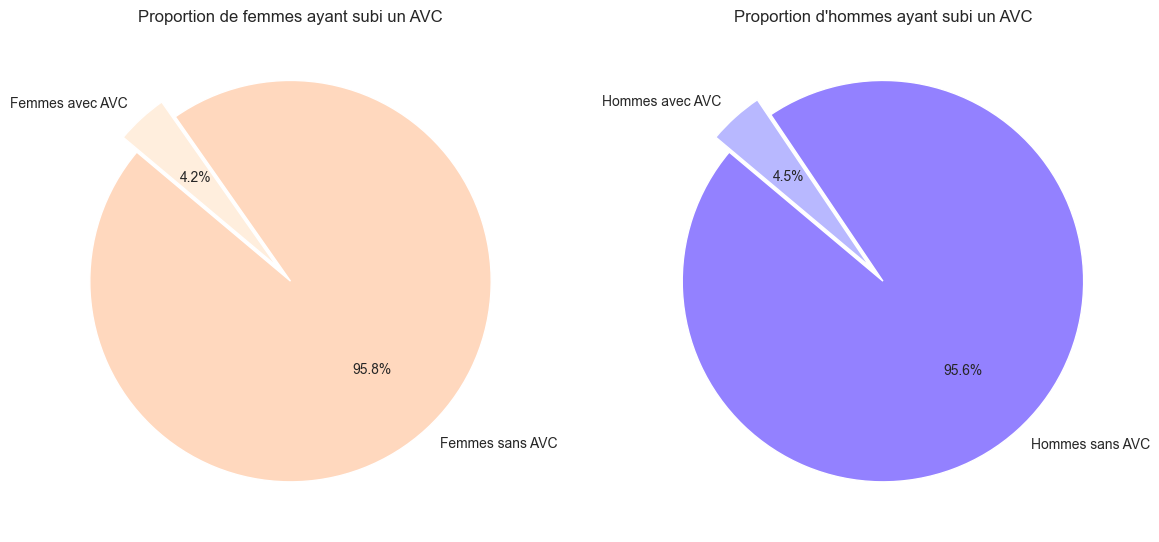

In [260]:
df = init_traitement_DB()
femmes = df[df["gender"] == "Female"]
hommes = df[df["gender"]== "Male"]

total_female = len(femmes)

female_strokes = femmes[femmes['stroke'] == 1]
total_female_strokes = len(female_strokes)

# Calculer la proportion de femmes ayant subi un AVC
proportion_female_strokes = total_female_strokes / total_female

male_data = df[df['gender'] == 'Male']
total_male = len(male_data)

male_strokes = male_data[male_data['stroke'] == 1]
total_male_strokes = len(male_strokes)

# Calculer la proportion d'hommes ayant subi un AVC
proportion_male_strokes = total_male_strokes / total_male

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
labels_female = ['Femmes sans AVC', 'Femmes avec AVC']
sizes_female = [total_female - total_female_strokes, total_female_strokes]
colors_female = ['#FFD8BE', '#FFEEDD']
explode_female = (0, 0.1)
plt.pie(sizes_female, explode=explode_female, labels=labels_female, colors=colors_female, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de femmes ayant subi un AVC')

plt.subplot(1, 2, 2)
labels_male = ['Hommes sans AVC', 'Hommes avec AVC']
sizes_male = [total_male - total_male_strokes, total_male_strokes]
colors_male = ['#9381FF', '#B8B8FF']
explode_male = (0, 0.1)
plt.pie(sizes_male, explode=explode_male, labels=labels_male, colors=colors_male, autopct='%1.1f%%', startangle=140)
plt.title('Proportion d\'hommes ayant subi un AVC')

plt.tight_layout()  # Pour éviter que les graphiques ne se chevauchent
plt.show()

Est-ce que les antécédents de santé ont un impact sur les risques d’avoir un AVC ?".

C’est-à-dire est-ce que les maladies du cœur et l’hypertension ont des conséquences sur le risque de faire un AVC. 

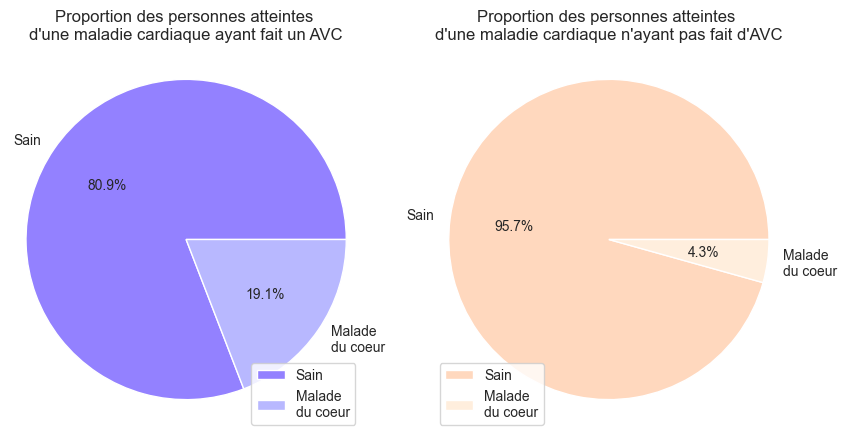

In [261]:
df = init_traitement_DB()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heart_diseases_stroke = df[df["stroke"] == 1]['heart_disease'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(heart_diseases_stroke, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Proportion des personnes atteintes \nd'une maladie cardiaque ayant fait un AVC")
plt.axis('equal') 
plt.legend()

heart_diseases_healthy = df[df["stroke"] == 0]['heart_disease'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(heart_diseases_healthy, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Proportion des personnes atteintes \nd'une maladie cardiaque n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()
plt.show()

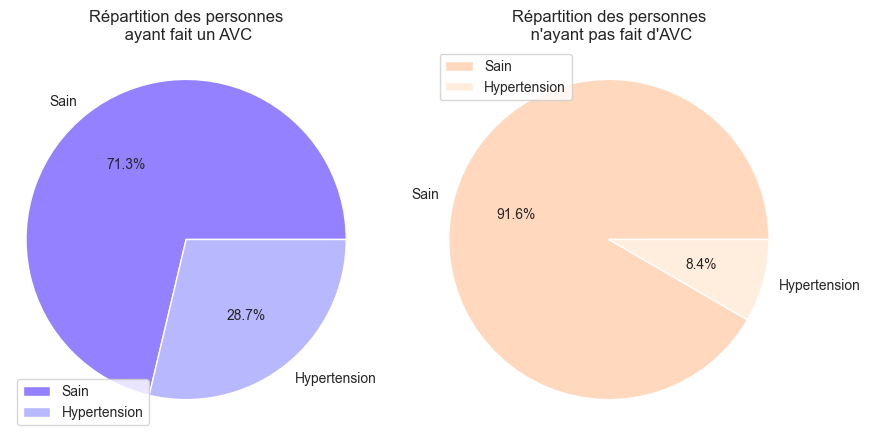

In [262]:
df = init_traitement_DB()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
hypertension_stroke = df[df["stroke"] == 1]['hypertension'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(hypertension_stroke, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Répartition des personnes\n ayant fait un AVC")
plt.axis('equal') 
plt.legend()

hypertension_healthy = df[df["stroke"] == 0]['hypertension'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(hypertension_healthy, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Répartition des personnes\n n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()

plt.show()

Diagrammes de Venn pour avoir une idée plus précise de la répartition de chaque profil en fonction des deux caractères médicaux. 

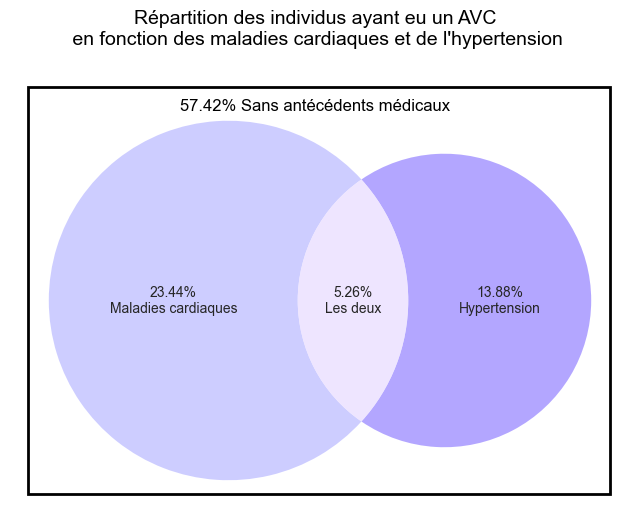

In [263]:
df = init_traitement_DB()
fig, ax = plt.subplots(figsize=(8, 6))

rectangle = plt.Rectangle((-0.74, -0.5), 1.5, 1.05, edgecolor='black', fill=False, linewidth=2)
ax.add_patch(rectangle)

all = df[(df["stroke"] == 1)].shape[0]
v3 = df[(df["stroke"] == 1) & (df["heart_disease"] == 1) & (df["hypertension"] == 1)].shape[0]
v2 = df[(df["stroke"] == 1) & (df["heart_disease"] == 1) & (df["hypertension"] == 0)].shape[0]
v1 = df[(df["stroke"] == 1) & (df["heart_disease"] == 0) & (df["hypertension"] == 1)].shape[0]
v4 = df[(df["stroke"] == 1) & (df["heart_disease"] == 0) & (df["hypertension"] == 0)].shape[0]


venn_diagram = venn2(subsets = (v1, v2, v3),set_colors=("#B8B8FF","#9381FF"), alpha=0.7, set_labels=None)
p1 = f"{round(v1 / all * 100, 2)}%\nMaladies cardiaques"
p2 = f"{round(v2 / all * 100, 2)}%\nHypertension"
p3 = f"{round(v3 / all * 100, 2)}%\nLes deux"
p4 = f"{round(v4 / all * 100, 2)}% Sans antécédents médicaux"
venn_diagram.get_label_by_id('10').set_text(p1)
venn_diagram.get_label_by_id('01').set_text(p2)
venn_diagram.get_label_by_id('11').set_text(p3)
plt.text(0, 0.50, p4, ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.7, "Répartition des individus ayant eu un AVC\n en fonction des maladies cardiaques et de l'hypertension", ha='center', va='center', fontsize=14, color='black')

plt.show()

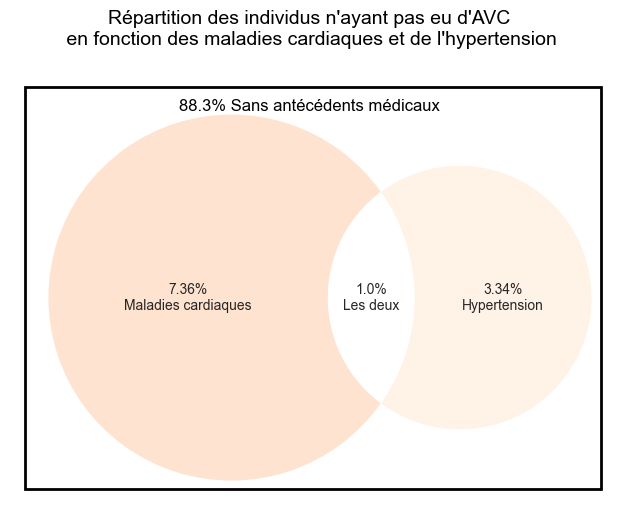

In [264]:
df = init_traitement_DB()
fig, ax = plt.subplots(figsize=(8, 6))

rectangle = plt.Rectangle((-0.74, -0.5), 1.5, 1.05, edgecolor='black', fill=False, linewidth=2)
ax.add_patch(rectangle)

all = df[(df["stroke"] == 0)].shape[0]
v3 = df[(df["stroke"] == 0) & (df["heart_disease"] == 1) & (df["hypertension"] == 1)].shape[0]
v2 = df[(df["stroke"] == 0) & (df["heart_disease"] == 1) & (df["hypertension"] == 0)].shape[0]
v1 = df[(df["stroke"] == 0) & (df["heart_disease"] == 0) & (df["hypertension"] == 1)].shape[0]
v4 = df[(df["stroke"] == 0) & (df["heart_disease"] == 0) & (df["hypertension"] == 0)].shape[0]


venn_diagram = venn2(subsets = (v1, v2, v3),set_colors=("#FFD8BE","#FFEEDD"), alpha=0.7, set_labels=None)
p1 = f"{round(v1 / all * 100, 2)}%\nMaladies cardiaques"
p2 = f"{round(v2 / all * 100, 2)}%\nHypertension"
p3 = f"{round(v3 / all * 100, 2)}%\nLes deux"
p4 = f"{round(v4 / all * 100, 2)}% Sans antécédents médicaux"
venn_diagram.get_label_by_id('10').set_text(p1)
venn_diagram.get_label_by_id('01').set_text(p2)
venn_diagram.get_label_by_id('11').set_text(p3)
plt.text(0, 0.50, p4, ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.7, "Répartition des individus n'ayant pas eu d'AVC\n en fonction des maladies cardiaques et de l'hypertension", ha='center', va='center', fontsize=14, color='black')

plt.show()

## Partie 2 : Comment le mode de vie influence-t-il le risque d'avoir un AVC ?

En étudiant la base de données, nous nous sommes demandé si la colonne “ever_married”, c’est-à-dire le fait d’être marié, avait un impact sur le risque d’avoir un AVC. Le graphique ci-dessous va nous permettre de représenter la corrélation entre les colonnes “ever_maried” et “stroke”. 
Pour la représentation ne soit pas biaisée, on regarde la proportion des individus mariés et non mariés qui ont eu un AVC puis sur la même figure, on regarde la proportion des individus mariés et non mariés qui n'ont pas eu d'AVC.

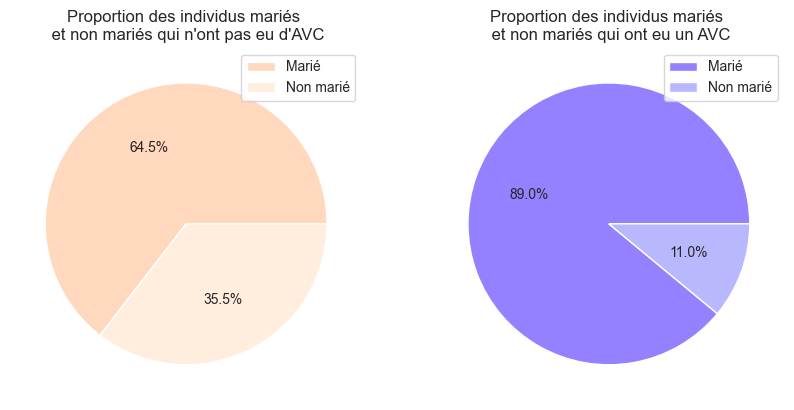

In [265]:
df = init_traitement_DB()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# on récupère tous les individus qui ont eu un AVC
df_stroke = df[df["stroke"] == 1]
# on représente la proportion des individus mariés et non mariés qui ont eu un AVC
df_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[1], colors=["#9381FF","#B8B8FF"], labels=None)
ax[1].set_title("Proportion des individus mariés \n et non mariés qui ont eu un AVC")
ax[1].legend(["Marié", "Non marié"])
ax[1].set_ylabel("")

# on représente la proportion des individus mariés et non mariés qui n'ont pas eu d'AVC
df_no_stroke = df[df["stroke"] == 0]
df_no_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0], colors=["#FFD8BE","#FFEEDD"], labels=None)
ax[0].set_title("Proportion des individus mariés \n et non mariés qui n'ont pas eu d'AVC")
ax[0].legend(["Marié", "Non marié"])
ax[0].set_ylabel("")

plt.show()

Attention cependant, le fait d’être marié dépend de l’âge. Donc pour avoir des diagrammes plus représentatifs, on va représenter la proportion des personnes ayant eu un AVC en fonction de leur âge ainsi que le fait d'être marié ou non.

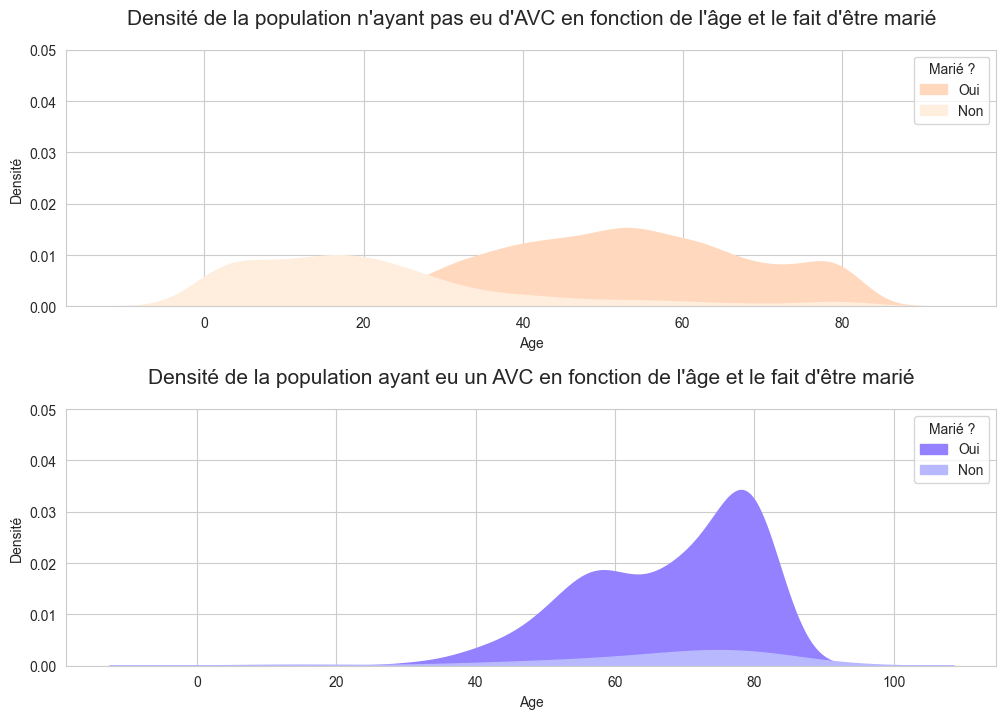

In [266]:
df = init_traitement_DB()
fig = plt.figure(figsize=(12, 8))
ax = [None, None]
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=0.4)

ax[0] = fig.add_subplot(gs[0, 0])
ax[1] = fig.add_subplot(gs[1, 0])

ax[1].text(0.5, 1.1, "Densité de la population ayant eu un AVC en fonction de l'âge et le fait d'être marié", horizontalalignment='center', fontsize=15, transform=ax[1].transAxes)
ax[0].text(0.5, 1.1, "Densité de la population n'ayant pas eu d'AVC en fonction de l'âge et le fait d'être marié", horizontalalignment='center', fontsize=15, transform=ax[0].transAxes)

df_no_stroke = df[df["stroke"] == 0]
df_stroke = df[df["stroke"] == 1]

sns.kdeplot(hue="ever_married", x="age", data=df_no_stroke, ax=ax[0], fill=True, palette=["#FFEEDD","#FFD8BE"],alpha = 1, hue_order=["No", "Yes"])
sns.kdeplot(hue="ever_married", x="age", data=df_stroke, ax=ax[1], fill=True, palette=["#B8B8FF", "#9381FF"], alpha = 1, hue_order=["No", "Yes"])

ax[0].set_ylim(0, 0.05)
ax[1].set_ylim(0, 0.05)
ax[0].legend(["Oui", "Non"], title="Marié ?")
ax[1].legend(["Oui", "Non"], title="Marié ?")
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Densité")
ax[1].set_ylabel("Densité")

plt.show()

De la même manière, quel est le lien entre le type d’emploi de l'individu et son risque d’avoir un AVC ? 

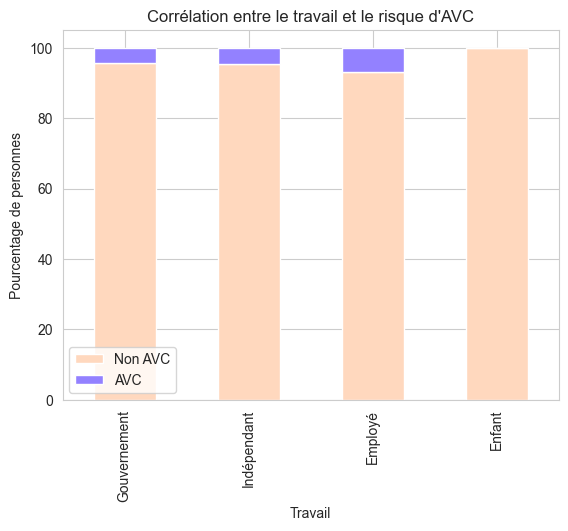

In [267]:
df = init_traitement_DB()
df_work_type = df.groupby("work_type")["stroke"].value_counts(normalize=True).unstack() * 100
df_work_type.plot(kind="bar", stacked=True, color=["#FFD8BE", "#9381FF"])
plt.title("Corrélation entre le travail et le risque d'AVC")
plt.xlabel("Travail")
plt.ylabel("Pourcentage de personnes")
plt.legend(["Non AVC", "AVC"])
plt.xticks([0, 1, 2, 3], ["Gouvernement", "Indépendant", "Employé", "Enfant"])
plt.show()

Enfin, fumer affecte-t-il la probabilité de faire un AVC ?
Attention, la colonne "smoking_status" contient des valeurs manquantes. On a donc décidé de ne pas les afficher, car elles ne nous permettent pas de tirer des conclusions.

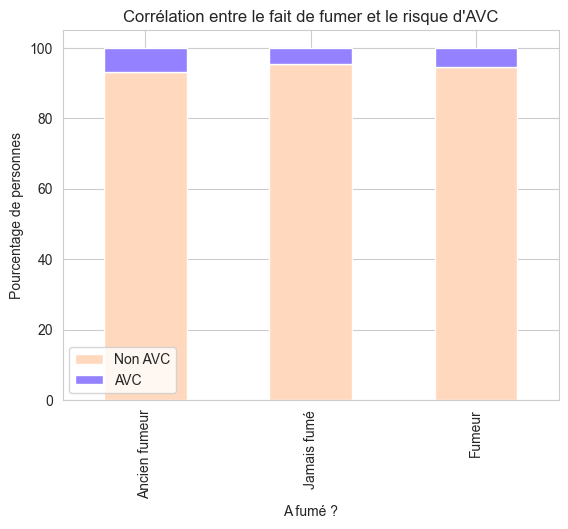

In [268]:
df = init_traitement_DB()
df_smoking_status = df[df["smoking_status"] != "Unknown"]
df_smoking_status = df_smoking_status.groupby("smoking_status")["stroke"].value_counts(normalize=True).unstack() * 100
df_smoking_status.plot(kind="bar", stacked=True, color=["#FFD8BE", "#9381FF"])
plt.title("Corrélation entre le fait de fumer et le risque d'AVC")
plt.xlabel("A fumé ?")
plt.ylabel("Pourcentage de personnes")
plt.legend(["Non AVC", "AVC"])
plt.xticks([0, 1, 2], ["Ancien fumeur", "Jamais fumé", "Fumeur"])
plt.show()

Avant de traiter les données, on s’est tous dit que c’était évident qu’il existait une corrélation entre le lieu de résidence de l’individu et son risque de faire un AVC, est-ce-que les données de la base confirment cette idée ?  
On fait comme pour l'étude de la corélation entre le fait d'être marié et le risque d'AVC

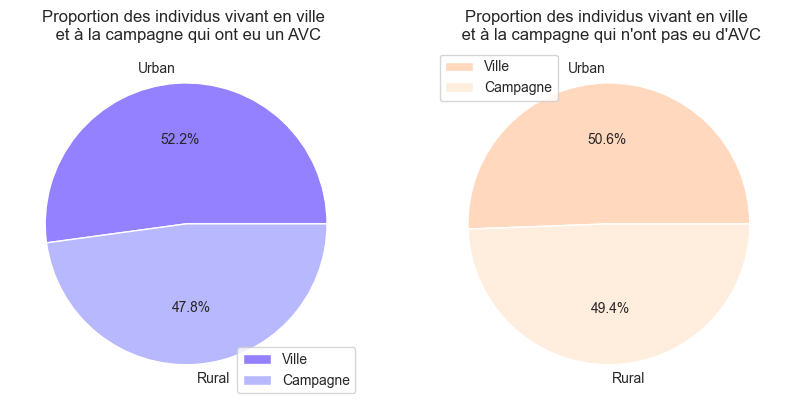

In [269]:
df = init_traitement_DB()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_stroke = df[df["stroke"] == 1]
df_stroke["Residence_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0], colors=["#9381FF","#B8B8FF"])
ax[0].set_title("Proportion des individus vivant en ville \n et à la campagne qui ont eu un AVC")
df_no_stroke = df[df["stroke"] == 0]
df_no_stroke["Residence_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[1], colors=["#FFD8BE","#FFEEDD"])
ax[1].set_title("Proportion des individus vivant en ville \n et à la campagne qui n'ont pas eu d'AVC")
ax[0].legend(["Ville", "Campagne"])
ax[1].legend(["Ville", "Campagne"])
ax[0].set_ylabel("")
ax[1].set_ylabel("")
plt.show()

Passons maintenant à des caractéristiques de santé. Anisi, un IMC et un taux de glucose moyen dans le sang augmente-t-il le risque de faire un AVC ?

Modèle statique :

In [270]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['bmi'])
df_new = df_copy.drop(columns=['id','gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
fig = px.parallel_coordinates(df_new, color="stroke", title='Visualisation de la répartition des individus en fonction de leur âge, leur taux de glucose et leur IMC', color_continuous_scale=["#FFD8BE","#9381FF"], labels={"age": "Age", "avg_glucose_level": "Taux de glucose", "bmi": "IMC", "stroke": "AVC"})
fig.update_layout(
    coloraxis_colorbar=dict(
        title="AVC",
        tickvals=[0, 1],
        ticktext=["Non", "Oui"],
    )
)

fig.show()

Modèle dynamique :

In [271]:
df = init_traitement_DB()

df_avc = df[df['stroke'] == 1]

# Affichage des points pour les personnes ou individus victimes d'un AVC
trace_stroke = go.Scatter3d(
    x=df[df['stroke'] == 1]['bmi'],
    y=df[df['stroke'] == 1]['avg_glucose_level'],
    z=[1] * len(df[df['stroke'] == 1]),  
    mode='markers',
    marker=dict(
        color='#9381FF',
        size=5,
        opacity=0.9
    ),
    name='AVC'
)

# Affichage des points pour les personnes ou individus non victimes d'un AVC

trace_no_stroke = go.Scatter3d(
    x=df[df['stroke'] == 0]['bmi'],
    y=df[df['stroke'] == 0]['avg_glucose_level'],
    z=[0] * len(df[df['stroke'] == 0]), 
    mode='markers',
    marker=dict(
        color='#FFD8BE',
        size=5,
        opacity=0.5
    ),
    name='Pas d\'AVC'
)

#Ajout d'un layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='IMC'),
        yaxis=dict(title='Taux de glucose moyen dans le sang'),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title='Relation entre IMC, Taux de glucose moyen dans le sang et AVC'
)

fig = go.Figure(data=[trace_stroke, trace_no_stroke], layout=layout)

fig.show()


Le lieu de vie, le travail mais également la famille peuvent influencer le taux de stress, un changement de mode de vie et de lieu de vie. Voyons si ces caractères ont un impact important sur le risque d’avoir un AVC. 

In [272]:
df = init_traitement_DB()
df = df[df["age"] > 18]
grouped = df.groupby(["Residence_type", "work_type", "ever_married"])["stroke"].mean().reset_index()

fig = px.scatter(grouped, x="Residence_type", y="work_type",
                 size="stroke", color="ever_married", color_discrete_map={"Yes": "#FFD8BE", "No": "#9381FF"},
                 hover_name="Residence_type", facet_col="ever_married",
                 title="Impact du lieu de vie, du travail et de la situation familiale sur le risque d'AVC",
                 labels={"stroke": "Pourcentage d'AVC", "Residence_type": "Lieu de vie", "work_type": "Travail"},
                 width=800, height=600)
fig.update_layout(showlegend=True)
fig.update_layout(legend_title_text="Marié ?")
fig.for_each_trace(lambda t: t.update(marker=dict(line=dict(width=1, color='Black'))))

fig.show()

## Partie 3 : Étude de la corrélation entre les deux familles de facteurs

Pour les individus de moins de 50 ans, est-ce que le taux de glucose, leur lieu de vie et leurs habitudes liées aux tabac ont-ils une influence sur le risque de faire un AVC ?

C:\Users\lilis\AppData\Local\Temp\ipykernel_8108\397182634.py:14: UserWarning:

The sizes list has more values (2) than needed (1), which may not be intended.



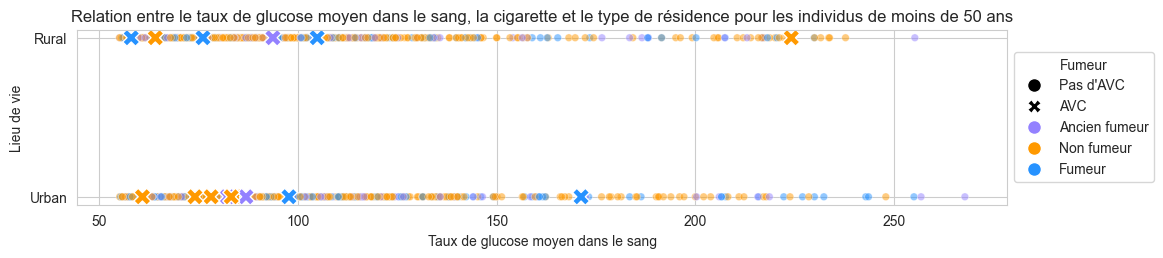

In [273]:
df = init_traitement_DB()

df_below_50 = df[df['age'] < 50]

df_below_50_known_smoking = df_below_50[df_below_50['smoking_status'] != 'Unknown']

df_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 1]
df_no_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 0]

legend_labels = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

#Individu n'ayant pas eu un avc
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[30, 150], style='stroke', markers=['o'], alpha=0.5)

#Individu ayant eu un avc
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[150], marker='X', zorder=2)

#Création de la légende
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#000000', markersize=10, label='Pas d\'AVC'),
    plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='#000000', markersize=10, label='AVC'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#9381FF', markersize=10, label='Ancien fumeur'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9900', markersize=10, label='Non fumeur'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#2692FF', markersize=10, label='Fumeur')
]

plt.legend(handles=custom_legend, title='Fumeur', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Relation entre le taux de glucose moyen dans le sang, la cigarette et le type de résidence pour les individus de moins de 50 ans')
plt.xlabel('Taux de glucose moyen dans le sang')
plt.ylabel('Lieu de vie')
plt.gca().set_aspect(40)  #gère l'espace vertical

Si on regroupe l'ensemble des caractéristiques liées à la santé, voyons comment sont réparties les individus. 

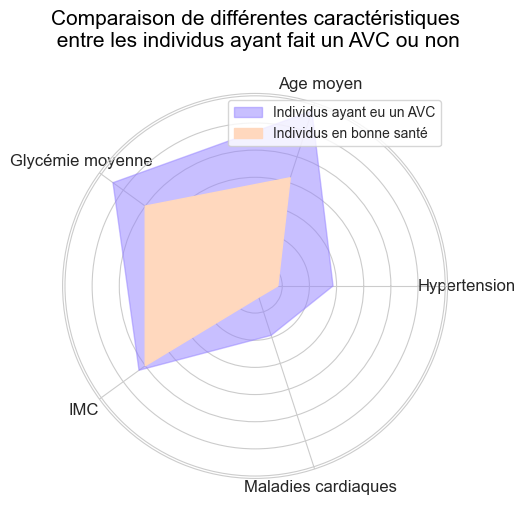

In [274]:
df = init_traitement_DB()
df_copy = df.copy()
df = df_copy.dropna(subset=['bmi'])

categories = ['Hypertension', "Age moyen", 'Glycémie moyenne ', 'IMC', 'Maladies cardiaques']
hypertension_healthy = df[(df["stroke"] == 0)]["hypertension"].mean()
age_healthy = df[(df["stroke"] == 0)]["age"].mean()
glucose_healthy = df[(df["stroke"] == 0)]["avg_glucose_level"].mean()
bmi_healthy = df[(df["stroke"] == 0)]["bmi"].mean()
heart_healthy = df[(df["stroke"] == 0)]["heart_disease"].mean()

hypertension_avc = df[(df["stroke"] == 1)]["hypertension"].mean()
age_avc = df[(df["stroke"] == 1)]["age"].mean()
glucose_avc = df[(df["stroke"] == 1)]["avg_glucose_level"].mean()
bmi_avc = df[(df["stroke"] == 1)]["bmi"].mean()
heart_avc = df[(df["stroke"] == 1)]["heart_disease"].mean()

values1 = [hypertension_healthy, age_healthy/100, 0.5, 0.5, heart_healthy]  
values2 = [hypertension_avc, age_avc/100, glucose_avc*0.5/glucose_healthy, bmi_avc*0.5/bmi_healthy, heart_avc]  
num_categories = len(categories)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
values1 += values1[:1]
angles += angles[:1]
values2 += values2[:1]

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(polar=True))
ax.fill(angles, values2, color="#9381FF", alpha=0.5, label='Individus ayant eu un AVC')
ax.fill(angles, values1, color="#FFD8BE", alpha=1, label='Individus en bonne santé')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

plt.legend(loc='upper right')
plt.title('Comparaison de différentes caractéristiques\n entre les individus ayant fait un AVC ou non', size=15, color='black', y=1.1)

plt.show()

## Conclusion

Corrélation

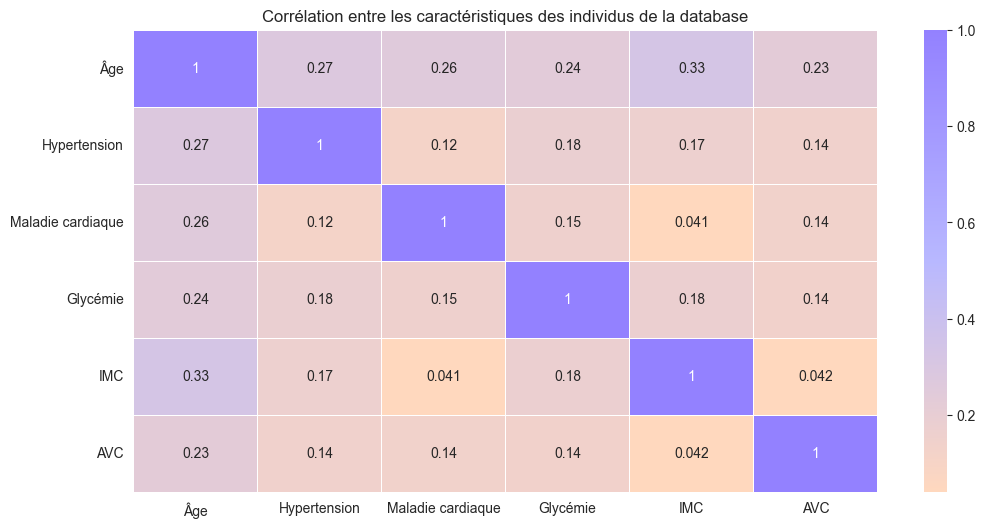

In [275]:
df = init_traitement_DB()

def get_custom_color_palette_hash():
    return LinearSegmentedColormap.from_list("", [
        '#FFD8BE',
        '#B8B8FF',
        '#9381FF'
    ])

df = df.rename(columns={'age': 'Âge', 'hypertension': 'Hypertension', 'heart_disease': 'Maladie cardiaque', 'avg_glucose_level': "Glycémie", "bmi": "IMC", "stroke": "AVC"}, errors="raise")
df = df.drop(['id'], axis=1)

plt.figure(figsize=(12,6))
# exclude id column
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=get_custom_color_palette_hash(), linewidths=0.5)
plt.title('Corrélation entre les caractéristiques des individus de la database')
plt.show()

Regardons vos risques !

In [276]:
df = init_traitement_DB()

id2 = df[df["smoking_status"] == "Unknown"].index
df = df.drop(id2)
# On regroupe les colonnes par ce que l'on souhaite faire avec en renommant les variables
def map_values(column, mapping, default='Unknown'):
    return column.map(lambda x: mapping.get(x, default))

# Définition des fonctions de mapping
hypertension_mapping = {0: 'Pas d\'hypertension', 1: 'Hypertension'}
heart_disease_mapping = {0: 'Pas de maladie cardiaque', 1: 'Maladie cardiaque'}
stroke_mapping = {0: 'Pas d\'AVC', 1: 'AVC'}
residence_type_mapping = {'Urban': 'Citadin', 'Rural': 'Rural'}
gender_mapping = {'Male': 'Homme', 'Female': 'Femme', 'Other': 'Autre'}
smoking_status_mapping = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

# On effectue chaque mapping à chaque colonne
df['gender'] = map_values(df['gender'], gender_mapping)
df['hypertension'] = map_values(df['hypertension'], hypertension_mapping)
df['heart_disease'] = map_values(df['heart_disease'], heart_disease_mapping)
df['stroke'] = map_values(df['stroke'], stroke_mapping)
df['smoking_status'] = map_values(df['smoking_status'], smoking_status_mapping)
df['Residence_type'] = map_values(df['Residence_type'], residence_type_mapping)

# On décide de couper la population en deux : les plus ou moins de 50 ans
df['age_group'] = pd.cut(df['age'], bins=[0, 50, float('inf')], labels=['Moins de 50', 'Plus de 50'])

# On les regroupe et on compte les individus par catégorie
grouped = df.groupby(['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke']).size().reset_index(name='count')

# On calcule les pourcentage dans le dernier cercle
total_strokes = grouped[grouped['stroke'] == 'AVC']['count'].sum()
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_strokes) * 100 if row['stroke'] == 'AVC' else None, axis=1)


fig = px.sunburst(grouped, path=['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke'], values='percentage')

fig.update_layout(
    title="Diagramme en anneau représentant le pourcentage d'AVC en fonctions de certaines catégories",
    width=1300,  
    height=1300   
)

fig.show()

C:\Users\lilis\AppData\Local\Temp\ipykernel_8108\1752228681.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lilis\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lilis\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\lili